In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import model_from_json

In [2]:
N = 20000
start = -0.25
target = 0
bold_theta0 = np.random.normal(target,1,N)
thetas = np.random.uniform(-1,1,N)
bold_theta = np.random.normal(thetas,1,N)
bold_theta1 = np.random.normal(start,1,N)

In [3]:
bold_theta0_train = np.stack([bold_theta0,thetas],axis=1)
bold_theta_train = np.stack([bold_theta,thetas],axis=1)
x_vals = np.concatenate([bold_theta0_train,bold_theta_train])
y_vals = np.concatenate([np.ones(len(bold_theta0_train)),np.zeros(len(bold_theta_train))])
X_train, X_val, Y_train, Y_val = train_test_split(x_vals, y_vals, test_size=0.5)

x_vals2 = np.concatenate([bold_theta0,bold_theta1])
y_vals2 = np.concatenate([np.ones(len(bold_theta0)),np.zeros(len(bold_theta1))])
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_vals2, y_vals2, test_size=0.5)

In [4]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.fit(X_train, Y_train, epochs=50,batch_size=100)

Epoch 1/50
200/200 [==============================] - 1s 838us/step - loss: 0.6664 - accuracy: 0.5855
Epoch 2/50
200/200 [==============================] - 0s 632us/step - loss: 0.6603 - accuracy: 0.5907
Epoch 3/50
200/200 [==============================] - 0s 774us/step - loss: 0.6594 - accuracy: 0.5919
Epoch 4/50
200/200 [==============================] - 0s 638us/step - loss: 0.6588 - accuracy: 0.5932
Epoch 5/50
200/200 [==============================] - 0s 628us/step - loss: 0.6583 - accuracy: 0.5910
Epoch 6/50
200/200 [==============================] - 0s 629us/step - loss: 0.6582 - accuracy: 0.5921
Epoch 7/50
200/200 [==============================] - 0s 618us/step - loss: 0.6579 - accuracy: 0.5925
Epoch 8/50
200/200 [==============================] - 0s 637us/step - loss: 0.6580 - accuracy: 0.5914
Epoch 9/50
200/200 [==============================] - 0s 623us/step - loss: 0.6573 - accuracy: 0.5910
Epoch 10/50
200/200 [==============================] - 0s 609us/step - loss: 0.657

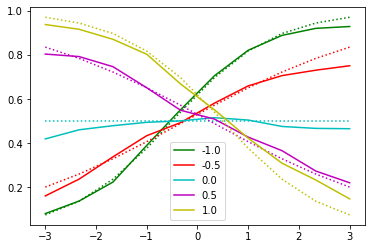

In [6]:
xx = np.linspace(-3,3,10)
cc = 0
mycolors = ['b','g','r','c','m','y','l']
for tt in np.linspace(-1,1,5):
    cc+=1
    plt.plot(xx,model.predict(np.stack([xx,tt*np.ones(10)],axis=1)),label=str(tt),color=mycolors[cc])
    llr = norm.pdf(xx,loc=target,scale=1)/norm.pdf(xx,loc=tt,scale=1)
    plt.plot(xx,llr/(1.+llr),ls=":",color=mycolors[cc])
    pass
plt.legend()

In [7]:
for l in model.layers:
    l.trainable=False

In [8]:
#this is a hack, but it works
inputs_hold = tf.keras.Input(shape=(1,))
simple_model = Dense(1,use_bias = False)(inputs_hold)
model3 = Model(inputs = inputs_hold, outputs = simple_model)

inputs = tf.keras.Input(shape=(1,))
inputs2 = tf.keras.layers.concatenate([inputs,model3(tf.ones_like(inputs))])
hidden_layer_1 = model(inputs2)
model2 = Model(inputs = inputs, outputs = hidden_layer_1)
model2.compile(loss='categorical_crossentropy', optimizer='Adam', )

In [9]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
tf.ones_like (TFOpLambda)       (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
model (Functional)              (None, 1)            1           tf.ones_like[0][0]               
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 2)            0           input_2[0][0]                    
                                                                 model[0][0]                

In [10]:
for i in range(50):
    #better to make a custom callback
    model2.fit(X_train2, Y_train2, epochs=1,batch_size=100)
    print(i,"Fitted result: ",model2.trainable_weights[0].numpy()[0][0])

200/200 [==============================] - 0s 444us/step - loss: 0.0000e+00
0 Fitted result:  -0.2026881
200/200 [==============================] - 0s 456us/step - loss: 0.0000e+00
1 Fitted result:  -0.24460809
200/200 [==============================] - 0s 488us/step - loss: 0.0000e+00
2 Fitted result:  -0.24395601
200/200 [==============================] - 0s 441us/step - loss: 0.0000e+00
3 Fitted result:  -0.24582683
200/200 [==============================] - 0s 450us/step - loss: 0.0000e+00
4 Fitted result:  -0.24323072
200/200 [==============================] - 0s 445us/step - loss: 0.0000e+00
5 Fitted result:  -0.24618739
200/200 [==============================] - 0s 450us/step - loss: 0.0000e+00
6 Fitted result:  -0.24192317
200/200 [==============================] - 0s 461us/step - loss: 0.0000e+00
7 Fitted result:  -0.24514042
200/200 [==============================] - 0s 457us/step - loss: 0.0000e+00
8 Fitted result:  -0.24879584
200/200 [==============================] - 0s 4